##EVALUACIÓN DE MODELOS
La evaluación de modelos en minería de datos es crucial para entender cómo se comporta un modelo y qué tan bien generaliza a datos no vistos.

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Datos de ejemplo
df_estudiantes = [
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Minería de Datos", "nota_final": 9.4},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Inteligencia de Negocios", "nota_final": 8.05},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Aprendizaje Profundo", "nota_final": 8.71},

    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Minería de Datos", "nota_final": 9.17},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Inteligencia de Negocios", "nota_final": 8.55},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Aprendizaje Profundo", "nota_final": 7.64},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Emprendimiento", "nota_final": 9.77},

    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Minería de Datos", "nota_final": 8.53},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Aprendizaje Profundo", "nota_final": 5.64},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Marcos de referencia", "nota_final": 5.91},

    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Minería de Datos", "nota_final": 8.63},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Inteligencia de Negocios", "nota_final": 8.45},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Aprendizaje Profundo", "nota_final": 8.68},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Marcos de referencia", "nota_final": 8.79},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Emprendimiento", "nota_final": 9.11},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Etica Profesional", "nota_final": 8.4},

    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Minería de Datos", "nota_final": 9.24},
    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Aprendizaje Profundo", "nota_final": 9.08},

    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Minería de Datos", "nota_final": 9.24},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Inteligencia de Negocios", "nota_final": 8.85},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Aprendizaje Profundo", "nota_final": 9.06},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Marcos de referencia", "nota_final": 9.32},

    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Minería de Datos", "nota_final": 9.71},
    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Aprendizaje Profundo", "nota_final": 9.08},

    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Minería de Datos", "nota_final": 8.74},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Inteligencia de Negocios", "nota_final": 8.85},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Aprendizaje Profundo", "nota_final": 8.39},

    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Minería de Datos", "nota_final": 9.28},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Inteligencia de Negocios", "nota_final": 8.91},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Aprendizaje Profundo", "nota_final": 8.25},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Marcos de referencia", "nota_final": 9.15},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Emprendimiento", "nota_final": 9.13},

    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Minería de Datos", "nota_final": 9.28},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Inteligencia de Negocios", "nota_final": 8.91},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Aprendizaje Profundo", "nota_final": 8.35},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Marcos de referencia", "nota_final": 6.17},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Emprendimiento", "nota_final": 6.08},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Etica Profesional", "nota_final": 10.00}
]

# Creación del DataFrame
df_estudiantes = pd.DataFrame(df_estudiantes)

# Mostrar el DataFrame
print(df_estudiantes)

        cedula               nombre                asignatura  nota_final
0   0106605017     Carlos Astudillo          Minería de Datos        9.40
1   0106605017     Carlos Astudillo  Inteligencia de Negocios        8.05
2   0106605017     Carlos Astudillo      Aprendizaje Profundo        8.71
3   0302365440  Jonnathan Astudillo          Minería de Datos        9.17
4   0302365440  Jonnathan Astudillo  Inteligencia de Negocios        8.55
5   0302365440  Jonnathan Astudillo      Aprendizaje Profundo        7.64
6   0302365440  Jonnathan Astudillo            Emprendimiento        9.77
7   0150564078       Danny Auquilla          Minería de Datos        8.53
8   0150564078       Danny Auquilla      Aprendizaje Profundo        5.64
9   0150564078       Danny Auquilla      Marcos de referencia        5.91
10  0107973687       Victor Cabrera          Minería de Datos        8.63
11  0107973687       Victor Cabrera  Inteligencia de Negocios        8.45
12  0107973687       Victor Cabrera   

In [12]:
# Datos de ejemplo para diagnostico
df_diagnostico = [
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Minería de Datos", "nota_diagnostico": 8},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 6},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 5.43},

    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Minería de Datos", "nota_diagnostico": 0.0},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 0.0},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 0.0},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Emprendimiento", "nota_diagnostico": 0.0},

    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Minería de Datos", "nota_diagnostico": 0.0},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 0.0},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Marcos de referencia", "nota_diagnostico": 3.89},

    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Minería de Datos", "nota_diagnostico": 8.00},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 0.00},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 5.22},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Marcos de referencia", "nota_diagnostico": 5.50},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Emprendimiento", "nota_diagnostico": 0.0},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Etica Profesional", "nota_diagnostico": 10},

    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Minería de Datos", "nota_diagnostico": 0.0},
    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 5.55},

    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Minería de Datos", "nota_diagnostico": 8},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 8},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 5.42},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Marcos de referencia", "nota_diagnostico": 5.07},

    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Minería de Datos", "nota_diagnostico": 0.0},
    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 4.42},

    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Minería de Datos", "nota_diagnostico": 10},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 6},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 4.89},

    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Minería de Datos", "nota_diagnostico": 8},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 9},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 6.40},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Marcos de referencia", "nota_diagnostico": 6.53},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Emprendimiento", "nota_diagnostico": 5},

    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Minería de Datos", "nota_diagnostico": 10},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Inteligencia de Negocios", "nota_diagnostico": 9},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Aprendizaje Profundo", "nota_diagnostico": 6.27},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Marcos de referencia", "nota_diagnostico": 7},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Emprendimiento", "nota_diagnostico": 3},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Etica Profesional", "nota_diagnostico": 10.00}
]

# Creación del DataFrame diagnostico
df_diagnostico = pd.DataFrame(df_diagnostico)

# Mostrar el DataFrame diagnostico
print(df_diagnostico)

        cedula               nombre                asignatura  \
0   0106605017     Carlos Astudillo          Minería de Datos   
1   0106605017     Carlos Astudillo  Inteligencia de Negocios   
2   0106605017     Carlos Astudillo      Aprendizaje Profundo   
3   0302365440  Jonnathan Astudillo          Minería de Datos   
4   0302365440  Jonnathan Astudillo  Inteligencia de Negocios   
5   0302365440  Jonnathan Astudillo      Aprendizaje Profundo   
6   0302365440  Jonnathan Astudillo            Emprendimiento   
7   0150564078       Danny Auquilla          Minería de Datos   
8   0150564078       Danny Auquilla      Aprendizaje Profundo   
9   0150564078       Danny Auquilla      Marcos de referencia   
10  0107973687       Victor Cabrera          Minería de Datos   
11  0107973687       Victor Cabrera  Inteligencia de Negocios   
12  0107973687       Victor Cabrera      Aprendizaje Profundo   
13  0107973687       Victor Cabrera      Marcos de referencia   
14  0107973687       Vict

In [9]:
# Datos de ejemplo
df_final = [
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Minería de Datos", "nota_final": 9.4},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Inteligencia de Negocios", "nota_final": 8.05},
    {"cedula": "0106605017", "nombre": "Carlos Astudillo", "asignatura": "Aprendizaje Profundo", "nota_final": 8.71},

    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Minería de Datos", "nota_final": 9.17},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Inteligencia de Negocios", "nota_final": 8.55},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Aprendizaje Profundo", "nota_final": 7.64},
    {"cedula": "0302365440", "nombre": "Jonnathan Astudillo", "asignatura": "Emprendimiento", "nota_final": 9.77},

    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Minería de Datos", "nota_final": 8.53},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Aprendizaje Profundo", "nota_final": 5.64},
    {"cedula": "0150564078", "nombre": "Danny Auquilla", "asignatura": "Marcos de referencia", "nota_final": 5.91},

    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Minería de Datos", "nota_final": 8.63},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Inteligencia de Negocios", "nota_final": 8.45},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Aprendizaje Profundo", "nota_final": 8.68},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Marcos de referencia", "nota_final": 8.79},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Emprendimiento", "nota_final": 9.11},
    {"cedula": "0107973687", "nombre": "Victor Cabrera", "asignatura": "Etica Profesional", "nota_final": 8.4},

    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Minería de Datos", "nota_final": 9.24},
    {"cedula": "0107957144", "nombre": "Paula Gomez", "asignatura": "Aprendizaje Profundo", "nota_final": 9.08},

    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Minería de Datos", "nota_final": 9.24},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Inteligencia de Negocios", "nota_final": 8.85},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Aprendizaje Profundo", "nota_final": 9.06},
    {"cedula": "1401416993", "nombre": "Maicol Lojano", "asignatura": "Marcos de referencia", "nota_final": 9.32},

    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Minería de Datos", "nota_final": 9.71},
    {"cedula": "0107416927", "nombre": "Jose Muños", "asignatura": "Aprendizaje Profundo", "nota_final": 9.08},

    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Minería de Datos", "nota_final": 8.74},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Inteligencia de Negocios", "nota_final": 8.85},
    {"cedula": "0107915126", "nombre": "Danny Pineda", "asignatura": "Aprendizaje Profundo", "nota_final": 8.39},

    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Minería de Datos", "nota_final": 9.28},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Inteligencia de Negocios", "nota_final": 8.91},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Aprendizaje Profundo", "nota_final": 8.25},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Marcos de referencia", "nota_final": 9.15},
    {"cedula": "0106422496", "nombre": "Paul Rodriguez", "asignatura": "Emprendimiento", "nota_final": 9.13},

    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Minería de Datos", "nota_final": 9.28},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Inteligencia de Negocios", "nota_final": 8.91},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Aprendizaje Profundo", "nota_final": 8.35},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Marcos de referencia", "nota_final": 6.17},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Emprendimiento", "nota_final": 6.08},
    {"cedula": "0105467815", "nombre": "Ariel Saquicela", "asignatura": "Etica Profesional", "nota_final": 10.00}
]

# Creación del DataFrame
df_final = pd.DataFrame(df_final)

# Mostrar el DataFrame
print(df_final)

        cedula               nombre                asignatura  nota_final
0   0106605017     Carlos Astudillo          Minería de Datos        9.40
1   0106605017     Carlos Astudillo  Inteligencia de Negocios        8.05
2   0106605017     Carlos Astudillo      Aprendizaje Profundo        8.71
3   0302365440  Jonnathan Astudillo          Minería de Datos        9.17
4   0302365440  Jonnathan Astudillo  Inteligencia de Negocios        8.55
5   0302365440  Jonnathan Astudillo      Aprendizaje Profundo        7.64
6   0302365440  Jonnathan Astudillo            Emprendimiento        9.77
7   0150564078       Danny Auquilla          Minería de Datos        8.53
8   0150564078       Danny Auquilla      Aprendizaje Profundo        5.64
9   0150564078       Danny Auquilla      Marcos de referencia        5.91
10  0107973687       Victor Cabrera          Minería de Datos        8.63
11  0107973687       Victor Cabrera  Inteligencia de Negocios        8.45
12  0107973687       Victor Cabrera   

In [14]:
# Realiza las uniones
df_combined = df_estudiantes \
    .merge(df_diagnostico, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_estudiantes, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_final, on=['cedula', 'nombre', 'asignatura'], how='left')

In [15]:
# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined)

DataFrame combinado:
        cedula               nombre                asignatura  nota_final_x  \
0   0106605017     Carlos Astudillo          Minería de Datos          9.40   
1   0106605017     Carlos Astudillo  Inteligencia de Negocios          8.05   
2   0106605017     Carlos Astudillo      Aprendizaje Profundo          8.71   
3   0302365440  Jonnathan Astudillo          Minería de Datos          9.17   
4   0302365440  Jonnathan Astudillo  Inteligencia de Negocios          8.55   
5   0302365440  Jonnathan Astudillo      Aprendizaje Profundo          7.64   
6   0302365440  Jonnathan Astudillo            Emprendimiento          9.77   
7   0150564078       Danny Auquilla          Minería de Datos          8.53   
8   0150564078       Danny Auquilla      Aprendizaje Profundo          5.64   
9   0150564078       Danny Auquilla      Marcos de referencia          5.91   
10  0107973687       Victor Cabrera          Minería de Datos          8.63   
11  0107973687       Victor Cab

In [16]:
# Preparar los datos para el modelo
X = df_combined[['nota_final', 'nota_diagnostico', 'nota_final_y']]
y = df_combined['nota_final_x']

In [17]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Realizar predicciones
y_pred = model.predict(X_test)

##Error Cuadrático Medio (MSE)
Descripción: Mide el promedio de los cuadrados de los errores (diferencias entre valores predichos y reales). Penaliza los errores grandes más severamente.

In [21]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")



Evaluación del modelo de regresión:
Error Cuadrático Medio (MSE): 0.00


##Interpretación:
Un MSE más bajo indica que el modelo está haciendo predicciones más cercanas a los valores reales.

##Error Absoluto Medio (MAE)
Descripción: Mide el promedio de las diferencias absolutas entre valores predichos y reales. Es menos sensible a los errores grandes en comparación con el MSE.

In [22]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")


Evaluación del modelo de regresión:
Error Absoluto Medio (MAE): 0.00


##Coeficiente de Determinación (R²)
Descripción: Mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Varía entre 0 (sin explicación) y 1 (explicación perfecta).

In [23]:
# Evaluar el modelo
r2 = r2_score(y_test, y_pred)

In [24]:
print("\nEvaluación del modelo de regresión:")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Evaluación del modelo de regresión:
Coeficiente de Determinación (R²): 1.00


##Interpretación:
Un R² más alto indica un mejor ajuste del modelo a los datos. Un R² negativo sugiere que el modelo es peor que un modelo simple que predice la media de los valores.

##Visualización de Predicciones vs. Valores Reales
Descripción: Un gráfico de dispersión para comparar las predicciones del modelo con los valores reales. La línea de referencia ayuda a visualizar cuán cerca están las predicciones de los valores reales.

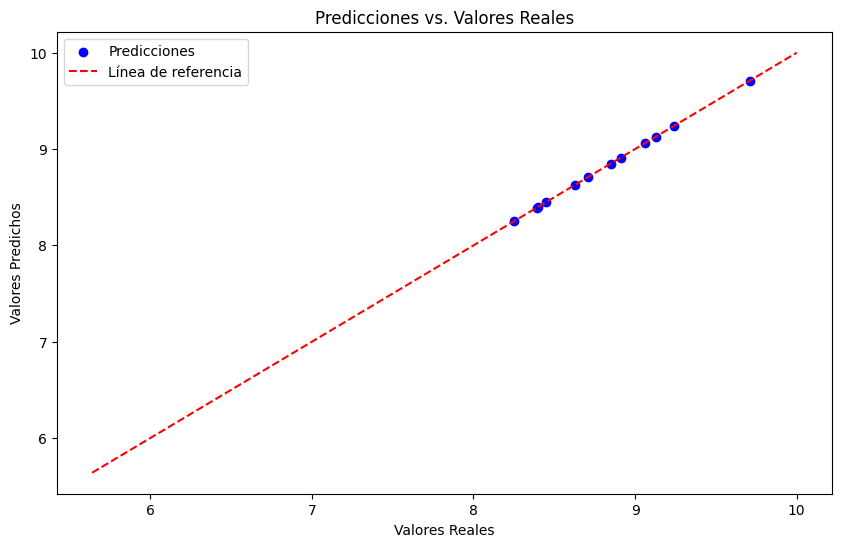

In [25]:
# Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

##Distribución de Errores
Descripción: Un histograma que muestra la distribución de los errores (diferencias entre valores reales y predicciones). La curva KDE (Kernel Density Estimate) ayuda a visualizar la forma de la distribución.

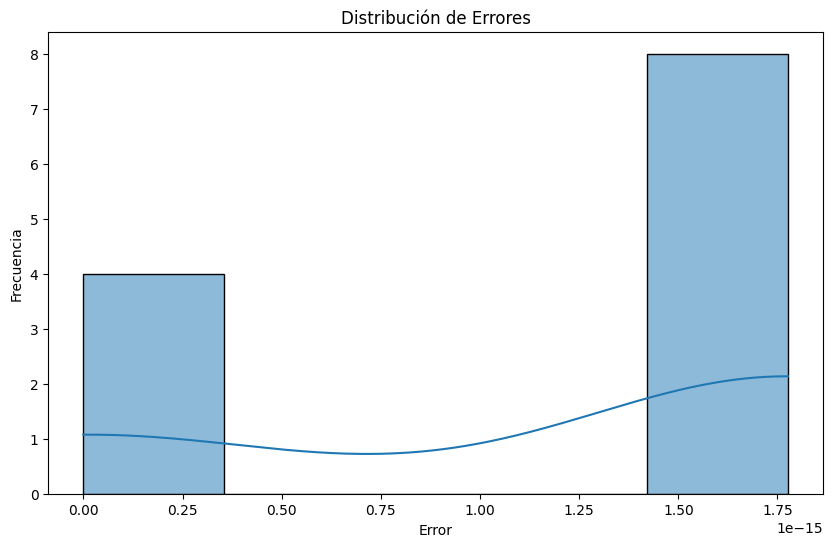

In [26]:
# Visualizar la distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.show()

#¿Qué métrica mide el promedio de los cuadrados de los errores en las predicciones del modelo?

B) Error Cuadrático Medio (MSE)
#¿Cuál es la interpretación de un valor bajo de MAE?

C) El modelo es preciso en promedio.
#¿Qué indica un valor de R² igual a 1?

C) El modelo explica perfectamente la varianza en los datos.
#¿Cuál es el propósito de dividir los datos en conjuntos de entrenamiento y prueba?

A) Para evaluar el rendimiento del modelo en datos no vistos.
#En la visualización de 'Predicciones vs. Valores Reales', ¿qué representa la línea de referencia?

C) La línea donde las predicciones serían perfectas.
#¿Qué información proporciona el histograma de errores?

C) La distribución de las diferencias entre valores reales y predicciones.
#¿Qué métrica es menos sensible a errores grandes y proporciona un promedio simple de las diferencias absolutas?

B) Error Absoluto Medio (MAE)
#¿Cuál es la función principal de la biblioteca sklearn en el notebook?

C) Construir y evaluar modelos predictivos.
#¿Qué función se utiliza para calcular el Error Cuadrático Medio en Python?

C) mean_squared_error()
#¿Qué se está intentando predecir en el modelo de regresión lineal?

D) nota_final2